In [43]:
%run "../../PyUtils/common.ipynb"
import sklearn

<IPython.core.display.Javascript object>

In [44]:
df = LoadDataSet("./leeh.csv")
print(df)
df['previouspef'] = df.pefmax.shift(1)
df['previouspef2'] = df.pefmax.shift(2)
df['previouspef3'] = df.pefmax.shift(3)

     cname ampm timeofday dateofmeasure    pef1    pef2    pef3  pefmax indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax   pmax   tmin     amin   pmin  tmode    amode  pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  so2maxpoi  so2maxtimepoi  \

In [45]:
df.loc[df.timeofday == 'null', 'timeofday'] = "00:00:00"
datetime = df.dateofmeasure + " " + df.timeofday 
df.insert(0, 'datetime', datetime)
df.datetime = pd.to_datetime(df.datetime)

df.dropna(inplace=True)

df.sort_values(by='pefmax', ascending=True, inplace=True)
quantile=[]
for k in range(len(df.index)):
    nearestTenQuantile = floor((k/len(df.index))*10)*10
    if(nearestTenQuantile <=40):
        quantile.append(1)
    elif(nearestTenQuantile >=80):
        quantile.append(3)
    else:
        quantile.append(2)
        

quantileSeries = pd.Series(quantile)
print(len(quantileSeries))
print(len(df.index))
df["quantile"] = quantileSeries.values

print(df)

df.sort_values(by='datetime', ascending=True, inplace=True)

350
350
               datetime cname ampm timeofday dateofmeasure    pef1    pef2    pef3  pefmax indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax   pmax   tmin     amin   pmin  tmode    amode  pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  

In [46]:
#toDrop  = "cname, ampm, timeofday, dateofmeasure, so2, co, o3, no2, pm10, so2poi, copoi, o3poi, no2poi, pm10poi, temperaturec, rainfallmm, windspeedms, precipitationpercent, vaporpressurehpa, dewpointtemperaturec, airpressurehpa, sealevelpressurehpa, groundtemperaturec, temperaturecpoi, rainfallmmpoi, windspeedmspoi, precipitationpercentpoi, vaporpressurehpapoi, dewpointtemperaturecpoi, airpressurehpapoi, sealevelpressurehpapoi, groundtemperaturecpoi, winddirection, winddirectionpoi, tmax, amax, pmax, tmin, amin, pmin, tmode, amode, pmode, tmaxlesstmin, amaxlessamin, pmaxlesspmin, tmaxpoi, amaxpoi, pmaxpoi, tminpoi, aminpoi, pminpoi, tmodepoi, amodepoi, pmodepoi, tmaxlesstminpoi, amaxlessaminpoi, pmaxlesspminpoi, so2max, so2maxtime, so2min, so2mintime, comax, comaxtime, comin, comintime, o3max, o3maxtime, o3min, o3mintime, no2max, no2maxtime, no2min, no2mintime, pm10max, pm10maxtime, pm10min, pm10mintime, so2maxpoi, so2maxtimepoi, so2minpoi, so2mintimepoi, comaxpoi, comaxtimepoi, cominpoi, comintimepoi, o3maxpoi, o3maxtimepoi, o3minpoi, o3mintimepoi, no2maxpoi, no2maxtimepoi, no2minpoi, no2mintimepoi, pm10maxpoi, pm10maxtimepoi, pm10minpoi, pm10mintimepoi".split(', ')
toDrop  = "cname, ampm, timeofday, dateofmeasure, datetime, pefmax, pef1, pef2, pef3".split(', ')
df=df.drop(toDrop, axis=1)
df=df.reset_index(drop=True)

In [47]:
print(df)

    indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax   pmax   tmin     amin   pmin  tmode    amode  pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  so2maxpoi  so2maxtimepoi  so2minpoi  so2mintimepoi  comaxpoi  comaxtimepoi  cominpoi  \
0      

In [48]:
print(df.index.size)

350


     indexpef   so2     co    o3   no2     pm10  so2poi  copoi  o3poi  no2poi  pm10poi  temperaturec  rainfallmm  windspeedms  precipitationpercent  vaporpressurehpa  dewpointtemperaturec  airpressurehpa  sealevelpressurehpa  groundtemperaturec  temperaturecpoi  rainfallmmpoi  windspeedmspoi  precipitationpercentpoi  vaporpressurehpapoi  dewpointtemperaturecpoi  airpressurehpapoi  sealevelpressurehpapoi  groundtemperaturecpoi  winddirection  winddirectionpoi   tmax     amax   pmax   tmin     amin   pmin  tmode    amode  pmode  tmaxlesstmin  amaxlessamin  pmaxlesspmin  tmaxpoi  amaxpoi  pmaxpoi  tminpoi  aminpoi  pminpoi  tmodepoi  amodepoi  pmodepoi  tmaxlesstminpoi  amaxlessaminpoi  pmaxlesspminpoi  so2max  so2maxtime  so2min  so2mintime  comax  comaxtime  comin  comintime  o3max  o3maxtime  o3min  o3mintime  no2max  no2maxtime  no2min  no2mintime  pm10max  pm10maxtime  pm10min  pm10mintime  so2maxpoi  so2maxtimepoi  so2minpoi  so2mintimepoi  comaxpoi  comaxtimepoi  cominpoi  \
0     

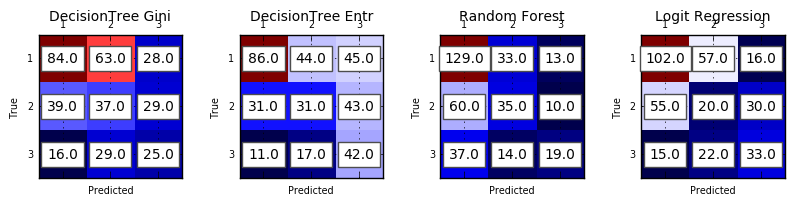

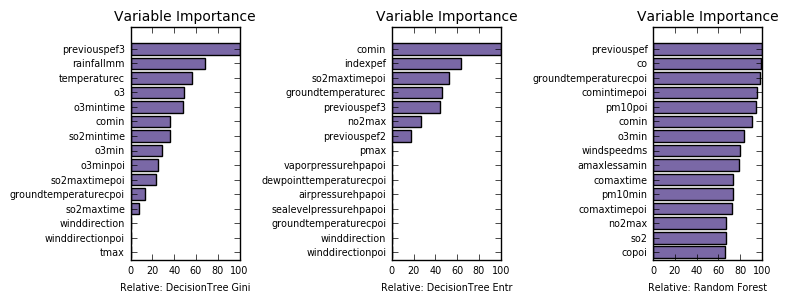

In [49]:
from sklearn.naive_bayes import GaussianNB
cls = [# Comment/uncomment out any classfiers according to your need 
       # DO NOT CHANGE
        "DecisionTree Gini" , tree.DecisionTreeClassifier(max_depth=4, criterion="gini", class_weight='balanced'),
        "DecisionTree Entr" , tree.DecisionTreeClassifier(max_depth=4, criterion="entropy", class_weight='balanced'), 
        #"SVM"               , sklearn.svm.SVC(), 
        "Random Forest"     , sklearn.ensemble.RandomForestClassifier(),
        #"K-NN"              , sklearn.neighbors.KNeighborsClassifier(),
        #"Gradient Boosting" , sklearn.ensemble.GradientBoostingClassifier(subsample=.85),
        "Logit Regression"  , sklearn.linear_model.LogisticRegression(class_weight='balanced'),
        #"Naive Bayes"       , GaussianNB(),
];
predictColumn="quantile"
df.replace(to_replace="am", value=0, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="pm", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="G", value=1, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="Y", value=2, inplace=True, limit=None, regex=False, method='pad', axis=1)
df.replace(to_replace="R", value=3, inplace=True, limit=None, regex=False, method='pad', axis=1)
print(df)
y = df[predictColumn]
#y.drop(y.index[0],inplace=True)
X = df.drop(predictColumn, axis=1)
#X.drop(X.index[X.index.size-1],inplace=True)
(X1,y1,ra,cls, y_preds, clfs) = Classify(X,y, True, drawConfusionMatrix=True, classifiers=cls, scale=True)

In [16]:
#get_ipython().reset()
decisionTrees = []

for k in range( int (len(cls)/2)) :
    d = cls[k*2+1];
    if (str(type(d)).find('DecisionTreeClassifier') > 0):
        decisionTrees.append(cls[k*2])
        decisionTrees.append(cls[k*2+1])

d = DrawDecisionTree(X,y, decisionTrees, class_names);

NameError: name 'class_names' is not defined